#導入所需套件


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
ext = '0.4.0-oneiric1_amd64.deb -qO'
!wget $url/libta-lib0_$ext libta.deb
!wget $url/ta-lib0-dev_$ext ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

(Reading database ... 124041 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.6) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import requests
import datetime as dt
import time
import talib

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#資料匯入及整理

In [ ]:
# data3017 = yf.download("3017.TW", "2021-01-01","2022-11-30",interval='1h') #最後有機會再回來 如果一小時為單位只能抓兩年內
data3017 = yf.download("3017.TW", "2017-05-01","2022-11-30")
data2353 = yf.download("2353.TW", "2017-05-01","2022-11-30")
data5258 = yf.download("5258.TW", "2017-05-01","2022-11-30")
data2352 = yf.download("2352.TW", "2017-05-01","2022-11-30")
data6235 = yf.download("6235.TW", "2017-05-01","2022-11-30")
data2324 = yf.download("2324.TW", "2017-05-01","2022-11-30")
data3231 = yf.download("3231.TW", "2017-05-01","2022-11-30")
data2356 = yf.download("2356.TW", "2017-05-01","2022-11-30")
data2382 = yf.download("2382.TW", "2017-05-01","2022-11-30")
data2301 = yf.download("2301.TW", "2017-05-01","2022-11-30")
data2376 = yf.download("2376.TW", "2017-05-01","2022-11-30")
data4916 = yf.download("4916.TW", "2017-05-01","2022-11-30")
data4938 = yf.download("4938.TW", "2017-05-01","2022-11-30")
data2465 = yf.download("2465.TW", "2017-05-01","2022-11-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
data2465.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,38.990368,39.513729,37.943645,37.943645,36.674122,333995
2000-01-05,35.457672,37.943645,35.457672,35.981049,34.777191,301180
2000-01-06,35.981049,37.420280,35.981049,37.158611,35.915352,278851
2000-01-07,37.158611,37.158611,35.981049,36.635246,35.409500,191535
2000-01-10,36.635246,38.728695,36.635246,37.812805,36.547657,543963


#resample

In [ ]:
rule = '60T'
Hour = data[(data['Hour'] >= 8) & (data['Hour'] <= 13)]
Hour.index = Hour.index + dt.timedelta(minutes=15)

d1 = Hour.resample(rule=rule, closed='right', label='left').first()[['open']]
d2 = Hour.resample(rule=rule, closed='right', label='left').max()[['high']]
d3 = Hour.resample(rule=rule, closed='right', label='left').min()[['low']]
d4 = Hour.resample(rule=rule, closed='right', label='left').last()[['close']]
d5 = Hour.resample(rule=rule, closed='right', label='left').sum()[['volume']]

df_Hour = pd.concat([d1,d2,d3,d4,d5], axis=1)
df_Hour = df_Hour.dropna()
df_Hour.index = df_Hour.index - dt.timedelta(minutes=15)
df_Hour['HourK'], df_Hour['HourD'] = talib.STOCH(df_Hour['high'], df_Hour['low'], df_Hour['close'], fastk_period=9, slowk_period=3, slowk_matype=1, slowd_period=3, slowd_matype=1)
df_Hour['HourMACD'], df_Hour['HourMACDsignal'], df_Hour['HourMACDhist'] = talib.MACD(df_Hour['close'], fastperiod=6, slowperiod=12, signalperiod=9)
df_Hour = df_Hour[df_Hour.index>= '2011-01-17' ]
df_Hour

,open,high,low,close,volume,HourK,HourD,HourMACD,HourMACDsignal,HourMACDhist
2011-01-17 08:45:00,8993.0,9002.0,8946.0,8953.0,22355,48.989065,49.785274,4.272043,11.768711,-7.496668
2011-01-17 09:45:00,8953.0,8970.0,8921.0,8927.0,27319,28.198236,38.991755,-0.936966,9.227576,-10.164542
2011-01-17 10:45:00,8927.0,8945.0,8914.0,8926.0,17557,20.917300,29.954528,-4.175951,6.546870,-10.722822
2011-01-17 11:45:00,8926.0,8946.0,8924.0,8932.0,8507,20.685923,25.320225,-5.158812,4.205734,-9.364546
2011-01-17 12:45:00,8932.0,8946.0,8915.0,8922.0,18123,14.888416,20.104321,-6.844770,1.995633,-8.840403
...,...,...,...,...,...,...,...,...,...,...
2022-05-20 09:45:00,16091.0,16124.0,16062.0,16105.0,19768,47.406439,39.457528,-0.158217,-1.434467,1.276250
2022-05-20 10:45:00,16104.0,16140.0,16104.0,16134.0,12993,55.229324,47.343426,13.585161,1.569459,12.015702
2022-05-20 11:45:00,16134.0,16140.0,16113.0,16128.0,7654,75.739662,61.541544,20.503240,5.356215,15.147025
2022-05-20 12:45:00,16129.0,16145.0,16110.0,16135.0,12758,86.331369,73.936457,24.706331,9.226238,15.480093


In [ ]:
# 計算日KD
# 抓取日收盤資料

rule = '1D'
Day = data[(data['Hour'] >= 8) & (data['Hour'] <= 13)]
Day.head(5)

d1 = Day.resample(rule=rule, closed='right', label='left').first()[['open']]
d2 = Day.resample(rule=rule, closed='right', label='left').max()[['high']]
d3 = Day.resample(rule=rule, closed='right', label='left').min()[['low']]
d4 = Day.resample(rule=rule, closed='right', label='left').last()[['close']]
d5 = Day.resample(rule=rule, closed='right', label='left').sum()[['volume']]

df_Day = pd.concat([d1,d2,d3,d4,d5], axis=1)
df_Day = df_Day.dropna()

df_Day['dailyK'], df_Day['dailyD'] = talib.STOCH(df_Day['high'], df_Day['low'], df_Day['close'], fastk_period=9, slowk_period=3, slowk_matype=1, slowd_period=3, slowd_matype=1)
df_Day['MACD'], df_Day['MACDsignal'], df_Day['MACDhist'] = talib.MACD(df_Day['close'], fastperiod=6, slowperiod=12, signalperiod=9)
df_Day = df_Day[df_Day.index>= '2011-01-17' ]
df_Day

# trainData = df_Morning[(df_Morning.index >= '2011-01-01 00:00:00')

,open,high,low,close,volume,dailyK,dailyD,MACD,MACDsignal,MACDhist
2011-01-17,8993.0,9002.0,8914.0,8922.0,93861,71.516630,70.002785,20.005380,19.949632,0.055748
2011-01-18,8920.0,9012.0,8871.0,8972.0,103387,77.999694,74.001240,22.531619,20.466029,2.065589
2011-01-19,8965.0,9063.0,8961.0,9049.0,65957,86.916514,80.458877,33.221912,23.017206,10.204706
2011-01-20,9018.0,9032.0,8996.0,9009.0,64787,85.226550,82.842713,32.948048,25.003374,7.944674
2011-01-21,8970.0,8975.0,8858.0,8907.0,139564,66.870701,74.856707,17.883712,23.579442,-5.695730
...,...,...,...,...,...,...,...,...,...,...
2022-05-17,15978.0,16096.0,15963.0,16075.0,76752,31.037354,25.748177,-154.774470,-180.527678,25.753208
2022-05-18,16180.0,16318.0,16159.0,16302.0,51713,60.466863,43.107520,-90.919367,-162.606016,71.686648
2022-05-19,15871.0,15965.0,15820.0,15911.0,109113,51.571460,47.339490,-99.889608,-150.062734,50.173126
2022-05-20,16069.0,16145.0,16013.0,16135.0,85478,62.898406,55.118948,-71.381969,-134.326581,62.944612


In [ ]:
daydf = df_Day.drop(columns=['open', 'high', 'low', 'close', 'volume'])
daydf = pd.DataFrame(np.repeat(daydf.values, 5, axis=0))
daydf.columns = ['dailyK', 'dailyD', 'dailyMACD', 'dailyMACDsignal', 'dailyMACDhist']
daydf.drop(daydf.tail(4).index,inplace=True) # drop last n rows
daydf.index = df_Hour.index
daydf

,dailyK,dailyD,dailyMACD,dailyMACDsignal,dailyMACDhist
2011-01-17 08:45:00,71.516630,70.002785,20.005380,19.949632,0.055748
2011-01-17 09:45:00,71.516630,70.002785,20.005380,19.949632,0.055748
2011-01-17 10:45:00,71.516630,70.002785,20.005380,19.949632,0.055748
2011-01-17 11:45:00,71.516630,70.002785,20.005380,19.949632,0.055748
2011-01-17 12:45:00,71.516630,70.002785,20.005380,19.949632,0.055748
...,...,...,...,...,...
2022-05-20 09:45:00,62.898406,55.118948,-71.381969,-134.326581,62.944612
2022-05-20 10:45:00,62.898406,55.118948,-71.381969,-134.326581,62.944612
2022-05-20 11:45:00,62.898406,55.118948,-71.381969,-134.326581,62.944612
2022-05-20 12:45:00,62.898406,55.118948,-71.381969,-134.326581,62.944612


In [ ]:
merged_df = pd.concat([df_Hour, daydf], axis=1)
merged_df

,open,high,low,close,volume,HourK,HourD,HourMACD,HourMACDsignal,HourMACDhist,dailyK,dailyD,dailyMACD,dailyMACDsignal,dailyMACDhist
2011-01-17 08:45:00,8993.0,9002.0,8946.0,8953.0,22355,48.989065,49.785274,4.272043,11.768711,-7.496668,71.516630,70.002785,20.005380,19.949632,0.055748
2011-01-17 09:45:00,8953.0,8970.0,8921.0,8927.0,27319,28.198236,38.991755,-0.936966,9.227576,-10.164542,71.516630,70.002785,20.005380,19.949632,0.055748
2011-01-17 10:45:00,8927.0,8945.0,8914.0,8926.0,17557,20.917300,29.954528,-4.175951,6.546870,-10.722822,71.516630,70.002785,20.005380,19.949632,0.055748
2011-01-17 11:45:00,8926.0,8946.0,8924.0,8932.0,8507,20.685923,25.320225,-5.158812,4.205734,-9.364546,71.516630,70.002785,20.005380,19.949632,0.055748
2011-01-17 12:45:00,8932.0,8946.0,8915.0,8922.0,18123,14.888416,20.104321,-6.844770,1.995633,-8.840403,71.516630,70.002785,20.005380,19.949632,0.055748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20 09:45:00,16091.0,16124.0,16062.0,16105.0,19768,47.406439,39.457528,-0.158217,-1.434467,1.276250,62.898406,55.118948,-71.381969,-134.326581,62.944612
2022-05-20 10:45:00,16104.0,16140.0,16104.0,16134.0,12993,55.229324,47.343426,13.585161,1.569459,12.015702,62.898406,55.118948,-71.381969,-134.326581,62.944612
2022-05-20 11:45:00,16134.0,16140.0,16113.0,16128.0,7654,75.739662,61.541544,20.503240,5.356215,15.147025,62.898406,55.118948,-71.381969,-134.326581,62.944612
2022-05-20 12:45:00,16129.0,16145.0,16110.0,16135.0,12758,86.331369,73.936457,24.706331,9.226238,15.480093,62.898406,55.118948,-71.381969,-134.326581,62.944612


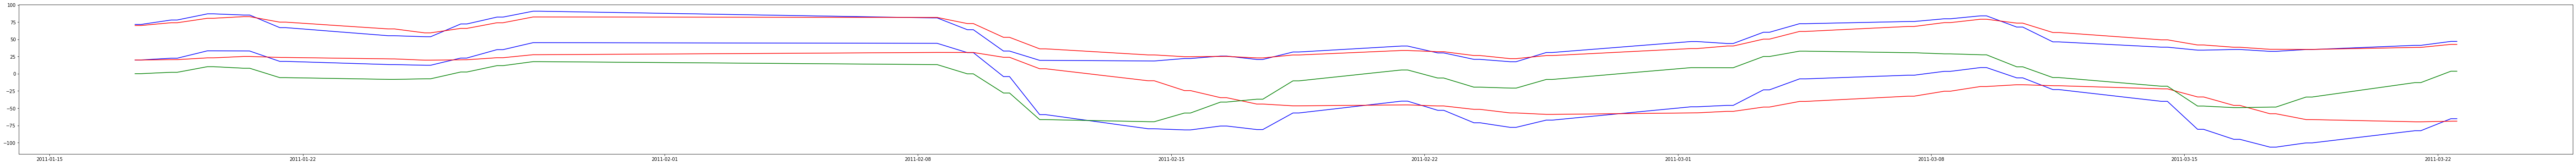

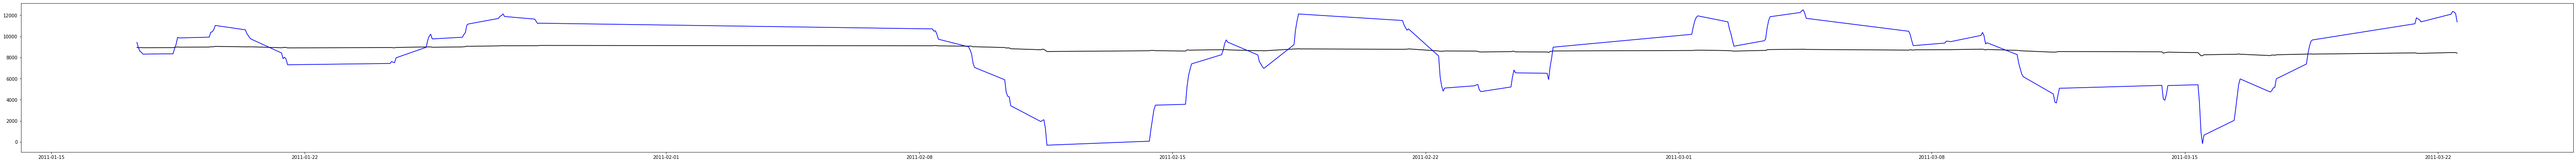

In [ ]:
plt.figure(figsize = (100,6))
# fig,ax1 = plt.subplots()
plt.plot(merged_df['dailyK'].head(200),'b')
plt.plot(merged_df['dailyD'].head(200),'r')
plt.plot(merged_df['dailyMACD'].head(200),'b')
plt.plot(merged_df['dailyMACDsignal'].head(200),'r')
plt.plot(merged_df['dailyMACDhist'].head(200),'g')


plt.figure(figsize = (100,6))
# plt.plot(merged_df['HourK'].head(200),'b')
# plt.plot(merged_df['HourD'].head(200),'r')
plt.plot(merged_df['close'].head(200),'black')
plt.plot((merged_df['HourMACD']*100+9000).head(200),'b')
# plt.plot(merged_df['HourMACDsignal'].head(200),'r')
# plt.plot(merged_df['HourMACDhist'].head(200),'g')


#選擇回測資料

In [ ]:
merged_df['Hour'] = merged_df.index.map(lambda x: x.hour)
trainData = merged_df[(merged_df.index >= '2011-01-01 00:00:00') & (merged_df.index <= '2019-12-31 00:00:00')].copy()
testData = merged_df[(merged_df.index >= '2020-1-1 00:00:00') & (merged_df.index <= '2022-5-22 00:00:00')].copy()

In [ ]:
trainData.head(3)

,open,high,low,close,volume,HourK,HourD,HourMACD,HourMACDsignal,HourMACDhist,dailyK,dailyD,dailyMACD,dailyMACDsignal,dailyMACDhist,Hour
2011-01-17 08:45:00,8993.0,9002.0,8946.0,8953.0,22355,48.989065,49.785274,4.272043,11.768711,-7.496668,71.51663,70.002785,20.00538,19.949632,0.055748,8
2011-01-17 09:45:00,8953.0,8970.0,8921.0,8927.0,27319,28.198236,38.991755,-0.936966,9.227576,-10.164542,71.51663,70.002785,20.00538,19.949632,0.055748,9
2011-01-17 10:45:00,8927.0,8945.0,8914.0,8926.0,17557,20.917300,29.954528,-4.175951,6.546870,-10.722822,71.51663,70.002785,20.00538,19.949632,0.055748,10


In [ ]:
testData.tail(3)

,open,high,low,close,volume,HourK,HourD,HourMACD,HourMACDsignal,HourMACDhist,dailyK,dailyD,dailyMACD,dailyMACDsignal,dailyMACDhist,Hour
2022-05-20 10:45:00,16104.0,16140.0,16104.0,16134.0,12993,55.229324,47.343426,13.585161,1.569459,12.015702,62.898406,55.118948,-71.381969,-134.326581,62.944612,10
2022-05-20 11:45:00,16134.0,16140.0,16113.0,16128.0,7654,75.739662,61.541544,20.503240,5.356215,15.147025,62.898406,55.118948,-71.381969,-134.326581,62.944612,11
2022-05-20 12:45:00,16129.0,16145.0,16110.0,16135.0,12758,86.331369,73.936457,24.706331,9.226238,15.480093,62.898406,55.118948,-71.381969,-134.326581,62.944612,12


#取得結算日資料

In [ ]:
settlementDate_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMBA/settlementDate.csv')

settlementDate_.columns = ['settlementDate', 'futures', 'settlementPrice']
settlementDate_

,settlementDate,futures,settlementPrice
0,2022/08/03,202208W1,14707
1,2022/07/27,202207W4,14887
2,2022/07/20,202207,14713
3,2022/07/13,202207W2,14384
4,2022/07/06,202207W1,14015
...,...,...,...
508,2009/12/16,200912,7752
509,2009/11/18,200911,7786
510,2009/10/21,200910,7705
511,2009/09/16,200909,7445


In [ ]:
bool_ = [False if 'W' in i else True for i in settlementDate_['futures']]
len(list(settlementDate_[bool_]['futures']))

156

In [ ]:
settlementDate = [i.replace('/','-') for i in list(settlementDate_[bool_]['settlementDate'])]
settlementDate = [pd.to_datetime(i).date() for i in settlementDate]
settlementDate[-5:]

[datetime.date(2009, 12, 16),
 datetime.date(2009, 11, 18),
 datetime.date(2009, 10, 21),
 datetime.date(2009, 9, 16),
 datetime.date(2009, 8, 19)]

#回測架構

In [ ]:
fund = 1000000 #初始投入資金
feePaid = 600 #手續費
P = 0.1 #停利
L = 0.02 #停損
# Low = -20
# High = 20

df_arr = np.array(trainData)
time_arr = np.array(trainData.index)
date_arr = [pd.to_datetime(i).date() for i in time_arr]

In [ ]:
print(df_arr[0])

[ 8.99300000e+03  9.00200000e+03  8.94600000e+03  8.95300000e+03
  2.23550000e+04  4.89890650e+01  4.97852745e+01  4.27204308e+00
  1.17687113e+01 -7.49666817e+00  7.15166299e+01  7.00027850e+01
  2.00053800e+01  1.99496321e+01  5.57478993e-02  8.00000000e+00]


In [ ]:
BS = None
buy = []
sell = []
sellshort = []
buytocover = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

for i in range(len(df_arr)):

    if i == len(df_arr)-1:
        break


    ## 進場邏輯
    ## entryLong
    entryLong = df_arr[i,12] > 20 and df_arr[i,10] > df_arr[i,11]

    ## entrySellShort
    # 2.3. 時MACD>0 、 時K < 時D
    entrySellShort = df_arr[i,14] < 0 and df_arr[i,5] > df_arr[i,6]

    # 結算不進場
    entryCondition = date_arr[i] not in settlementDate



    ## 出場邏輯
    ## exitShort
    exitShort = df_arr[i,12] < -20 and df_arr[i,10] < df_arr[i,11]

    ## exitBuyToCover
    exitBuyToCover = df_arr[i,14] > 0 and df_arr[i,5] < df_arr[i,6]

    # 結算日出場
    exitCondition = date_arr[i] in settlementDate and df_arr[i,15] >= 11

    # 停利停損邏輯
    if BS == 'B':
        stopLoss = df_arr[i,3] <= df_arr[t,0] * (1-L)
        stopProfit = df_arr[i,3] >= df_arr[t,0] * (1+P)
    elif BS == 'S':
        stopLoss = df_arr[i,3] >= df_arr[t,0] * (1+L)
        stopProfit = df_arr[i,3] <= df_arr[t,0] * (1-P)

#     if exitCondition == True:
#         print(f'{time_arr[i]}')

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)

        if entryLong and entryCondition:
            BS = 'B'
            t = i+1
            buy.append(t)

        elif entrySellShort and entryCondition:
            BS = 'S'
            t = i+1
            sellshort.append(t)

    elif BS == 'B':
        profit = 200 * (df_arr[i+1,0] - df_arr[i,0])
        profit_list.append(profit)

        if exitShort or i == len(df_arr)-2 or exitCondition or stopLoss or stopProfit:
        # if exitShort or i == len(df_arr)-2 or exitCondition:
            pl_round = 200 * (df_arr[i+1,0] - df_arr[t,0])
            profit_fee = profit - feePaid*2
            profit_fee_list.append(profit_fee)
            sell.append(i+1)
            BS=None

            # Realized PnL
            profit_fee_realized = pl_round - feePaid*2
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)

    elif BS == 'S':
        profit = 200 * (df_arr[i,0] - df_arr[i+1,0])
        profit_list.append(profit)

        if exitBuyToCover or i == len(df_arr)-2 or exitCondition or stopLoss or stopProfit:
        # if exitBuyToCover or i == len(df_arr)-2 or exitCondition:
            pl_round = 200 * (df_arr[t,0] - df_arr[i+1,0])
            profit_fee = profit - feePaid*2
            profit_fee_list.append(profit_fee)
            buytocover.append(i+1)
            BS=None

            # Realized PnL
            profit_fee_realized = pl_round - feePaid*2
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)

                       profit  profitfee
2011-01-17 08:45:00       0.0        0.0
2011-01-17 09:45:00       0.0        0.0
2011-01-17 10:45:00   -5200.0    -5200.0
2011-01-17 11:45:00   -5400.0    -5400.0
2011-01-17 12:45:00   -4200.0    -4200.0
...                       ...        ...
2019-12-30 08:45:00  943800.0   684600.0
2019-12-30 09:45:00  940000.0   680800.0
2019-12-30 10:45:00  942800.0   683600.0
2019-12-30 11:45:00  941400.0   682200.0
2019-12-30 12:45:00  940400.0   680000.0

[11000 rows x 2 columns]


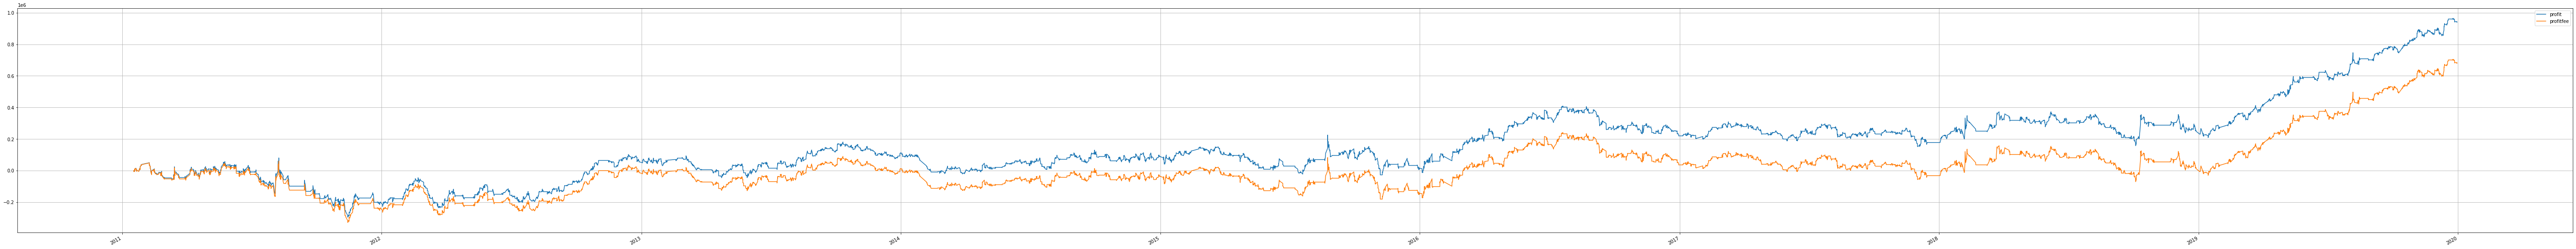

In [ ]:
equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=trainData.index)
print(equity)
equity.plot(grid=True, figsize=(100,10));

#績效呈現

In [ ]:
# 實際交易位置
print(buy)
print(sell)
print(sellshort)
print(buytocover)

[1, 16, 226, 296, 436, 556, 616, 896, 937, 1161, 1251, 1362, 1413, 1736, 1796, 1896, 2041, 2301, 2431, 2536, 2640, 2776, 2861, 3051, 3231, 3301, 3397, 3536, 3626, 3706, 3806, 3926, 4116, 4246, 4431, 4671, 4741, 4866, 4961, 5051, 5126, 5242, 5721, 5751, 5802, 5875, 5907, 6096, 6211, 6251, 6576, 6711, 6822, 6936, 6986, 7081, 7201, 7341, 7406, 7556, 7706, 7797, 7896, 8046, 8116, 8271, 8426, 8561, 8626, 8766, 8976, 9006, 9196, 9226, 9361, 9451, 9686, 9831, 9851, 9941, 10031, 10301, 10379, 10591, 10715, 10736, 10926]
[14, 65, 294, 389, 469, 576, 656, 924, 1004, 1249, 1319, 1381, 1434, 1749, 1826, 1944, 2069, 2389, 2484, 2574, 2661, 2859, 2894, 3079, 3299, 3384, 3461, 3609, 3704, 3745, 3894, 3989, 4204, 4304, 4501, 4739, 4821, 4959, 5049, 5124, 5171, 5311, 5749, 5761, 5859, 5891, 5919, 6116, 6249, 6344, 6649, 6764, 6864, 6951, 7069, 7121, 7294, 7389, 7459, 7651, 7764, 7884, 7984, 8067, 8209, 8299, 8451, 8619, 8682, 8809, 8994, 9111, 9214, 9311, 9401, 9486, 9707, 9849, 9939, 10029, 10119, 103

In [ ]:
equity.iloc[-3:]

,profit,profitfee
2019-12-30 10:45:00,942800.0,683600.0
2019-12-30 11:45:00,941400.0,682200.0
2019-12-30 12:45:00,940400.0,680000.0


In [ ]:
equity['equity'] = equity['profitfee'] + fund
equity['drawdown_percent'] = (equity['equity'] / equity['equity'].cummax()) - 1
equity['drawdown'] = equity['equity'] - equity['equity'].cummax()

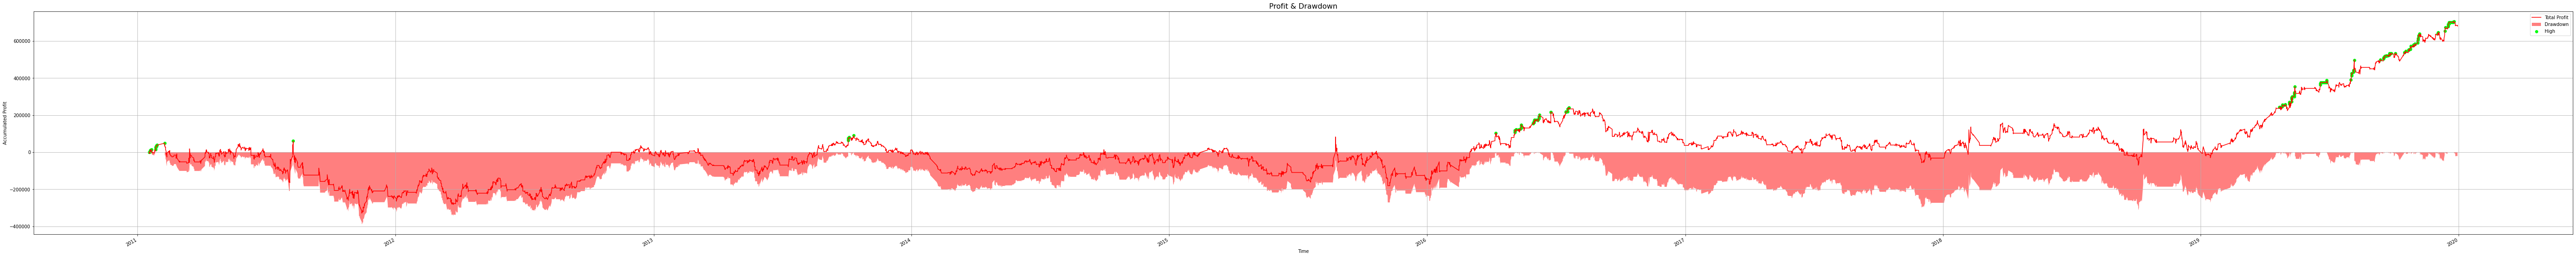

In [ ]:
fig, ax = plt.subplots(figsize = (100,10))

high_index = equity[equity['profitfee'].cummax() == equity['profitfee']].index
equity['profitfee'].plot(label = 'Total Profit', ax = ax, c = 'r', grid=True)
plt.fill_between(equity['drawdown'].index, equity['drawdown'], 0, facecolor  = 'r', label = 'Drawdown', alpha=0.5)
plt.scatter(high_index, equity['profitfee'].loc[high_index],c = '#02ff0f', label = 'High')

plt.legend()
plt.ylabel('Accumulated Profit')
plt.xlabel('Time')
plt.title('Profit & Drawdown',fontsize  = 16);

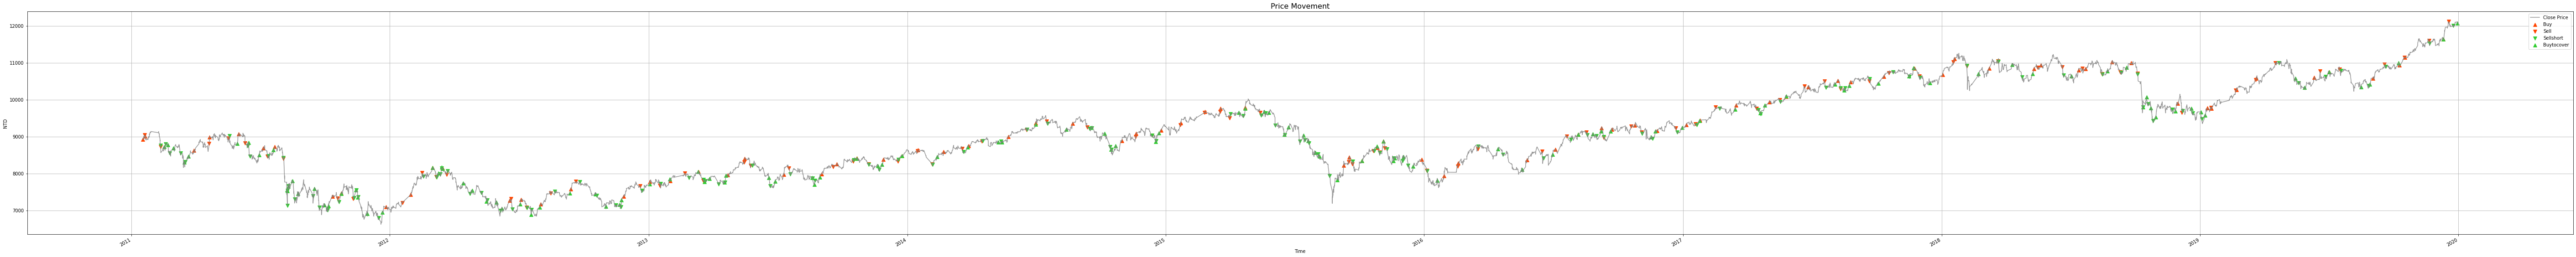

In [ ]:
fig, ax = plt.subplots(figsize = (100,10))

trainData['close'].plot(label = 'Close Price', ax = ax, c = 'gray', grid=True, alpha=0.8)
plt.scatter(trainData['close'].iloc[buy].index, trainData['close'].iloc[buy],c = 'orangered', label = 'Buy', marker='^', s=60)
plt.scatter(trainData['close'].iloc[sell].index, trainData['close'].iloc[sell],c = 'orangered', label = 'Sell', marker='v', s=60)
plt.scatter(trainData['close'].iloc[sellshort].index, trainData['close'].iloc[sellshort],c = 'limegreen', label = 'Sellshort', marker='v', s=60)
plt.scatter(trainData['close'].iloc[buytocover].index, trainData['close'].iloc[buytocover],c = 'limegreen', label = 'Buytocover', marker='^', s=60)

plt.legend()
plt.ylabel('NTD')
plt.xlabel('Time')
plt.title('Price Movement',fontsize  = 16);

In [ ]:
profit = equity['profitfee'].iloc[-1]
ret = equity['equity'][-1]/equity['equity'][0] - 1
mdd = abs(equity['drawdown_percent'].min())
calmarRatio = ret / mdd
tradeTimes = len(buy)+len(sellshort)
winRate = len([i for i in profit_fee_list_realized if i > 0]) / len(profit_fee_list_realized)
profitFactor = sum([i for i in profit_fee_list_realized if i > 0]) / abs(sum([i for i in profit_fee_list_realized if i < 0]))
winLossRatio = np.mean([i for i in profit_fee_list_realized if i > 0]) / abs(np.mean([i for i in profit_fee_list_realized if i < 0]))

print(f'profit: ${np.round(profit,2)}')
print(f'return: {np.round(ret,4)*100}%')
print(f'mdd: {np.round(mdd,4)*100}%')
print(f'calmarRatio: {np.round(calmarRatio,2)}')
print(f'tradeTimes: {tradeTimes}')
print(f'winRate: {np.round(winRate,4)*100}%')
print(f'profitFactor: {np.round(profitFactor,2)}')
print(f'winLossRatio: {np.round(winLossRatio,2)}')

profit: $680000.0
return: 68.0%
mdd: 36.69%
calmarRatio: 1.85
tradeTimes: 217
winRate: 47.93%
profitFactor: 1.21
winLossRatio: 1.31


#樣本內策略最佳化


#樣本外

In [ ]:
fund = 1000000 #初始投入資金
feePaid = 600 #手續費
K = 0.02 #停利停損

df_arr = np.array(testData)
time_arr = np.array(testData.index)
date_arr = [pd.to_datetime(i).date() for i in time_arr]

In [ ]:
BS = None
bs = None
buy = []
sell = []
sellshort = []
buytocover = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

for i in range(len(df_arr)):

    if i == len(df_arr)-1:
        break


    ## 進場邏輯
    ## entryLong
    # 1.2.3.4.8. 日K > 日D
    entryLong = df_arr[i,10] > df_arr[i,11]
    # 5.6.7. 日K > 日D 、 日MACD>0
    # entryLong = df_arr[i,10] > df_arr[i,11] and df_arr[i,14]>0

    ## entrySellShort
    # 2.3. 時MACD>0 、 時K < 時D
    # entrySellShort = df_arr[i,5] < df_arr[i,6] and df_arr[i,9]>0
    # 4. 時K < 時D
    # entrySellShort = df_arr[i,5] < df_arr[i,6]
    # 5. 日K < 日D 且 、 時MACD<0
    # entrySellShort = df_arr[i,10] < df_arr[i,11]  and df_arr[i,14]<0

    # 結算不進場
    entryCondition = date_arr[i] not in settlementDate



    ## 出場邏輯
    ## exitShort
    # 1.2.3.4.7.8. 日K < 日D
    exitShort = df_arr[i,10] < df_arr[i,11]
    # 5. 日K < 日D 、 日MACD>0
    # exitShort = df_arr[i,10] < df_arr[i,11] and df_arr[i,14]>0
    # 6. 日K < 日D 、 日MACD<0
    # exitShort = df_arr[i,10] < df_arr[i,11] or df_arr[i,14]<0

    ## exitBuyToCover
    # 2.4. 時MACD>0 、時K > 時D
    # exitBuyToCover = df_arr[i,5] > df_arr[i,6] and df_arr[i,9]>0
    # 3. 時MACD>0 、時K > 時D
    # exitBuyToCover = df_arr[i,5] > df_arr[i,6]
    # 5. 日K > 日D 、 日MACD<0
    # exitBuyToCover = df_arr[i,10] > df_arr[i,11]  and df_arr[i,14]<0

    # 結算日出場
    exitCondition = date_arr[i] in settlementDate and df_arr[i,15] >= 11

    ## 停利停損邏輯
    if BS == 'B':
        stopLoss = df_arr[i,3] <= df_arr[t,0] * (1-L)
        # stopProfit = df_arr[i,3] >= df_arr[t,0] * (1+P)
    elif BS == 'S':
        # stopLoss = df_arr[i,3] >= df_arr[t,0] * (1+L)
        stopProfit = df_arr[i,3] <= df_arr[t,0] * (1-P)

#     if exitCondition == True:
#         print(f'{time_arr[i]}')

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)

        if entryLong and entryCondition:
            BS = 'B'
            t = i+1
            buy.append(t)

        # elif entrySellShort and entryCondition:
        #     BS = 'S'
        #     t = i+1
        #     sellshort.append(t)

    elif BS == 'B':
        profit = 200 * (df_arr[i+1,0] - df_arr[i,0])
        profit_list.append(profit)

        # if exitShort or i == len(df_arr)-2 or exitCondition or stopLoss or stopProfit:
        if exitShort or i == len(df_arr)-2 or exitCondition or stopLoss:
            pl_round = 200 * (df_arr[i+1,0] - df_arr[t,0])
            profit_fee = profit - feePaid*2
            profit_fee_list.append(profit_fee)
            sell.append(i+1)
            BS=None

            # Realized PnL
            profit_fee_realized = pl_round - feePaid*2
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)

    elif BS == 'S':
        profit = 200 * (df_arr[i,0] - df_arr[i+1,0])
        profit_list.append(profit)

        # if exitBuyToCover or i == len(df_arr)-2 or exitCondition or stopLoss or stopProfit:
        if i == len(df_arr)-2 or exitCondition or stopProfit:
            pl_round = 200 * (df_arr[t,0] - df_arr[i+1,0])
            profit_fee = profit - feePaid*2
            profit_fee_list.append(profit_fee)
            buytocover.append(i+1)
            BS=None

            # Realized PnL
            profit_fee_realized = pl_round - feePaid*2
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)

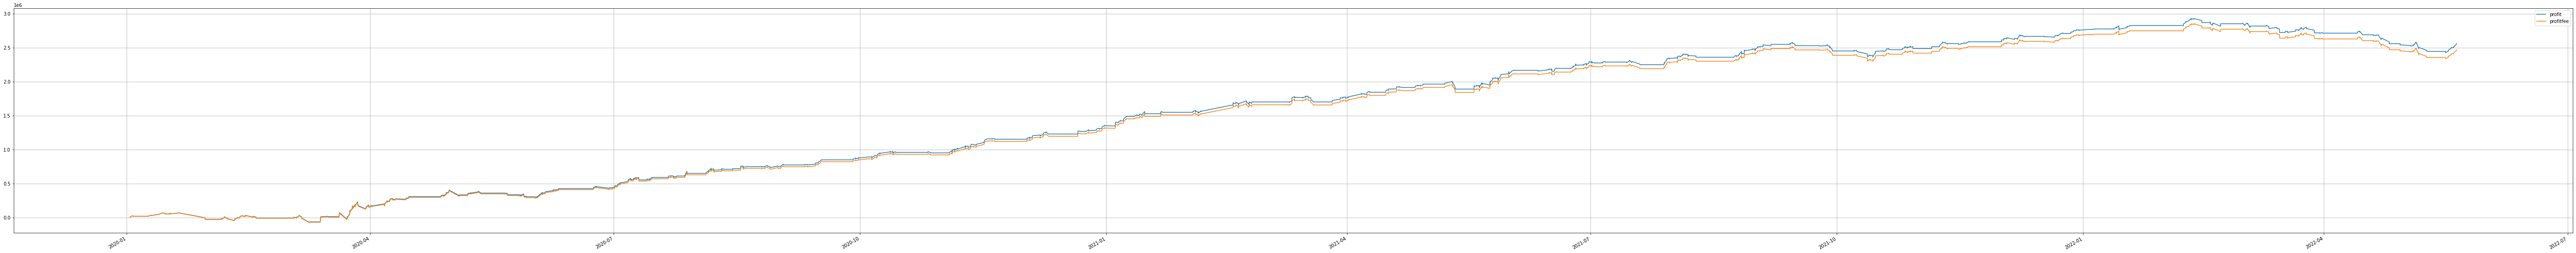

In [ ]:
equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=testData.index)
equity.plot(grid=True, figsize=(100,10));

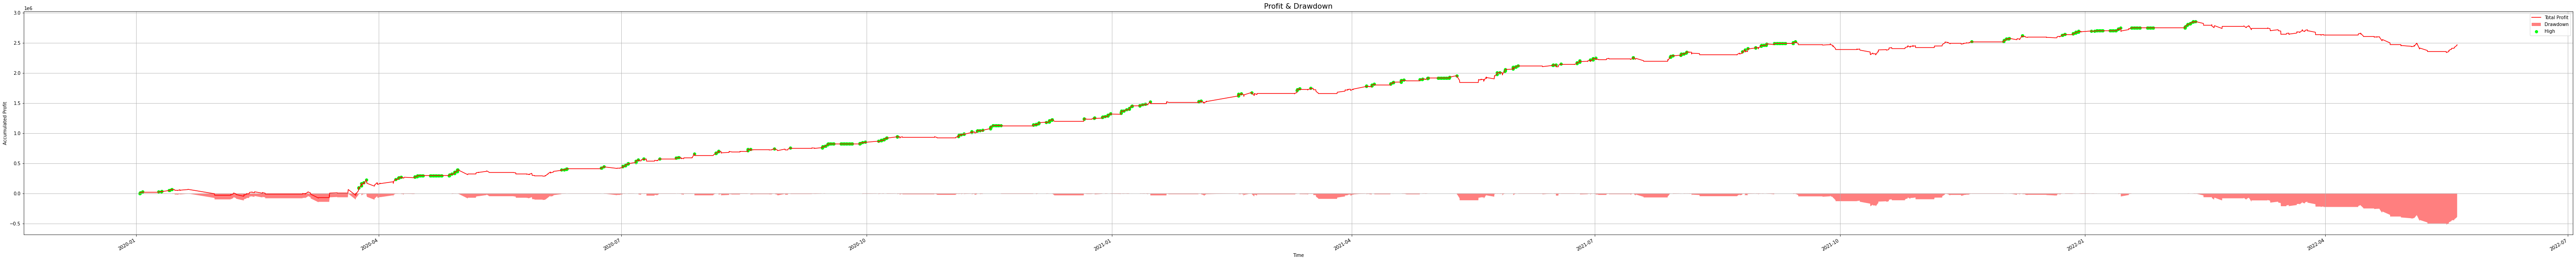

In [ ]:
equity['equity'] = equity['profitfee'] + fund
equity['drawdown_percent'] = (equity['equity'] / equity['equity'].cummax()) - 1
equity['drawdown'] = equity['equity'] - equity['equity'].cummax()

fig, ax = plt.subplots(figsize = (100,10))

high_index = equity[equity['profitfee'].cummax() == equity['profitfee']].index
equity['profitfee'].plot(label = 'Total Profit', ax = ax, c = 'r', grid=True)
plt.fill_between(equity['drawdown'].index, equity['drawdown'], 0, facecolor  = 'r', label = 'Drawdown', alpha=0.5)
plt.scatter(high_index, equity['profitfee'].loc[high_index],c = '#02ff0f', label = 'High')

plt.legend()
plt.ylabel('Accumulated Profit')
plt.xlabel('Time')
plt.title('Profit & Drawdown',fontsize  = 16);

Text(0.5, 1.0, 'Price Movement')

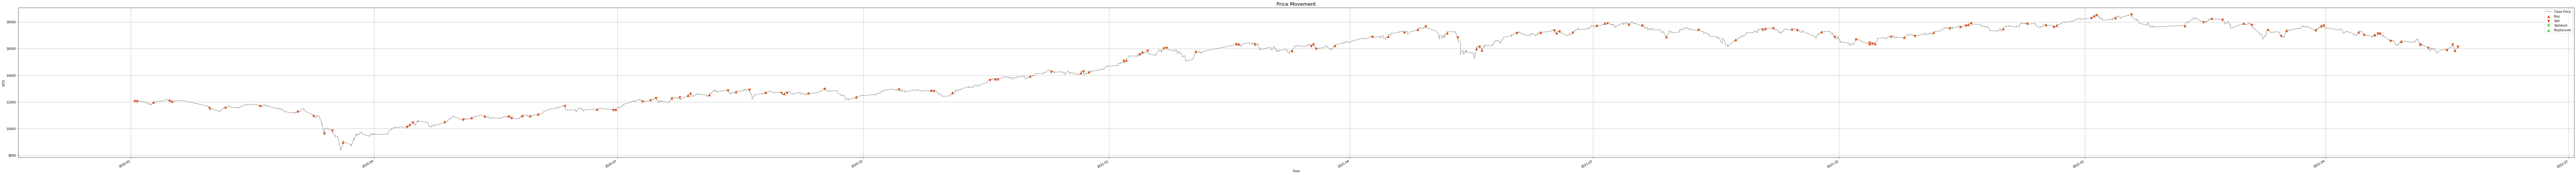

In [ ]:
fig, ax = plt.subplots(figsize = (150,10))

testData['close'].plot(label = 'Close Price', ax = ax, c = 'gray', grid=True, alpha=0.8)
plt.scatter(testData['close'].iloc[buy].index, testData['close'].iloc[buy],c = 'orangered', label = 'Buy', marker='^', s=60)
plt.scatter(testData['close'].iloc[sell].index, testData['close'].iloc[sell],c = 'orangered', label = 'Sell', marker='v', s=60)
plt.scatter(testData['close'].iloc[sellshort].index, testData['close'].iloc[sellshort],c = 'limegreen', label = 'Sellshort', marker='v', s=60)
plt.scatter(testData['close'].iloc[buytocover].index, testData['close'].iloc[buytocover],c = 'limegreen', label = 'Buytocover', marker='^', s=60)

plt.legend()
plt.ylabel('NTD')
plt.xlabel('Time')
plt.title('Price Movement',fontsize  = 16)

In [ ]:
profit = equity['profitfee'].iloc[-1]
ret = equity['equity'][-1]/equity['equity'][0] - 1
mdd = abs(equity['drawdown_percent'].min())
calmarRatio = ret / mdd
tradeTimes = len(buy)+len(sellshort)
winRate = len([i for i in profit_fee_list_realized if i > 0]) / len(profit_fee_list_realized)
profitFactor = sum([i for i in profit_fee_list_realized if i > 0]) / abs(sum([i for i in profit_fee_list_realized if i < 0]))
winLossRatio = np.mean([i for i in profit_fee_list_realized if i > 0]) / abs(np.mean([i for i in profit_fee_list_realized if i < 0]))

print(f'profit: ${np.round(profit,2)}')
print(f'return: {np.round(ret,4)*100}%')
print(f'mdd: {np.round(mdd,4)*100}%')
print(f'calmarRatio: {np.round(calmarRatio,2)}')
print(f'tradeTimes: {tradeTimes}')
print(f'winRate: {np.round(winRate,4)*100}%')
print(f'profitFactor: {np.round(profitFactor,2)}')
print(f'winLossRatio: {np.round(winLossRatio,2)}')

profit: $2465400.0
return: 246.54%
mdd: 13.74%
calmarRatio: 17.94
tradeTimes: 78
winRate: 67.95%
profitFactor: 3.4
winLossRatio: 1.6
